In [96]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,\
                            r2_score,median_absolute_error,explained_variance_score


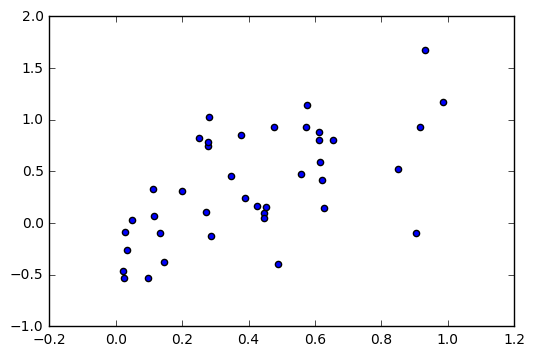

In [97]:
# don't worry about the code in this cell--it's just used to synthesize some data
def test_func(x, err=.5):
    y = np.random.normal(x, err)
    return y
def make_data(N=40, error=1.0):
    # randomly sample the data
    X = np.random.random(N)[:, None]
    y = test_func(X.ravel(), error)
    
    return X, y
X, y = make_data(40, error=.5)
X_test = np.linspace(-0.1, 1.1, 500)[:, None]
plt.scatter(X.ravel(), y)


In [98]:
model = LinearRegression()
model.fit(X,y)
y_pred = model.predict(X)
print model.coef_
print model.intercept_
#y_pred = test_func(X.ravel(), 1)


[ 1.17804957]
-0.117718944361


In [99]:
print "Mean Squared Error:       {:.4}".format(mean_squared_error(y,y_pred))
print "Mean Absolute Error:      {:.4}".format(mean_absolute_error(y,y_pred))
print "r2:                       {:.4}".format(r2_score(y,y_pred))
print "Median Absolute Error:    {:.4}".format(median_absolute_error(y,y_pred))
print "Explained Variance Score: {:.4}".format(explained_variance_score(y,y_pred))

Mean Squared Error:       0.1757
Mean Absolute Error:      0.3399
r2:                       0.3693
Median Absolute Error:    0.317
Explained Variance Score: 0.3693


In [100]:
y_steeper = y_pred * 10
print "Mean Squared Error:       {:.4}".format(mean_squared_error(y,y_steeper))
print "Mean Absolute Error:      {:.4}".format(mean_absolute_error(y,y_steeper))
print "r2:                       {:.4}".format(r2_score(y,y_steeper))
print "Median Absolute Error:    {:.4}".format(median_absolute_error(y,y_steeper))
print "Explained Variance Score: {:.4}".format(explained_variance_score(y,y_steeper))

Mean Squared Error:       19.48
Mean Absolute Error:      3.46
r2:                       -68.92
Median Absolute Error:    3.348
Explained Variance Score: -29.54


In [101]:
y_higher = y_pred + 10
print "Mean Squared Error:       {:.4}".format(mean_squared_error(y,y_higher))
print "Mean Absolute Error:      {:.4}".format(mean_absolute_error(y,y_higher))
print "r2:                       {:.4}".format(r2_score(y,y_higher))
print "Median Absolute Error:    {:.4}".format(median_absolute_error(y,y_higher))
print "Explained Variance Score: {:.4}".format(explained_variance_score(y,y_higher))

Mean Squared Error:       100.2
Mean Absolute Error:      10.0
r2:                       -358.6
Median Absolute Error:    10.02
Explained Variance Score: 0.3693
